In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

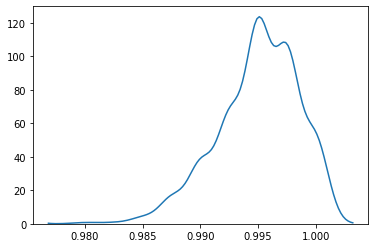

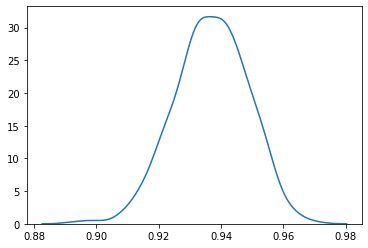

In [9]:
obs_negatives = 399
false_negatives = 401

test_obs = [True if i < 399 else False for i in range(401)]

specs = []
for trial in range(500):
    p = np.mean(np.random.choice(test_obs, size=401))
    specs.append(p)

sns.kdeplot(specs)

test_obs = [True if i < 178 else False for i in range(190)] # TODO: seems higher than their estimates??
sens = []
for trial in range(500):
    p = np.mean(np.random.choice(test_obs, size=401))
    sens.append(p)

plt.figure()
sns.kdeplot(sens)



In [12]:
def compute_likely_rate(sample, sensitivity, specificity):
    obs_rate = np.mean(sample)
    possible_rates = np.linspace(0, 0.05, 500)
    
    min_error = 10000
    min_rate = -1
    for pos_rate in possible_rates:
        implied_rate = sensitivity * pos_rate + (1 - specificity) * (1 - pos_rate)
        error = (implied_rate - obs_rate)**2
        if error < min_error:
            min_rate = pos_rate
            min_error = error
    return min_rate

observations = [True if i < 50 else False for i in range(3330)]

true_rates = []
for trial in tqdm(range(1000)):
    b_sample = np.random.choice(observations, size = len(observations))
    obs_rate = np.mean(b_sample)
    
    for spec in specs:
        true_rate = compute_likely_rate(b_sample, sensitivity=.803, specificity=spec) # lower bound is .721
        true_rates.append(true_rate)

100%|██████████| 1000/1000 [04:14<00:00,  3.92it/s]


[0.00170341 0.02164329]


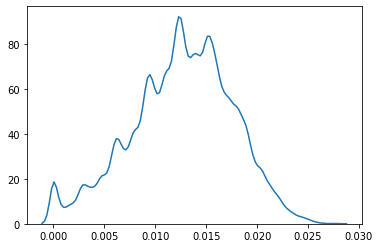

In [13]:
sns.kdeplot(true_rates)
print(np.quantile(true_rates, [0.025, 0.975]))